In [24]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
start= datetime.datetime(2006,1,1)

In [3]:
end= datetime.datetime(2016,1,1)

In [5]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [6]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [8]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.749325   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.621654   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.758445   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.548695   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.348064   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.170383  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.195881  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.297882  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.336124  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.731342  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.914894  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.638926  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.977213  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.692335  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  28.318438  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.324865  
2006-01-04  31.530001  10870000.0  20.089125  
2006-01-05  31.495001  10158000.0  20.066822  
2006-01-06  31.680000   8403800.0  20.184694  
2006-01-09  31.674999   5619600.0  20.181515  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.593655  
2015-12-28  54.680000   8288800.0  46.474667  
2015-12-29  55.290001   7894900.0  46.993126  
2015-12-30  54.889999   8016900.0  46.653145  
2015-12-31  54.360001  10929800.0  46.202682  

[2517 rows

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
for i in tickers:
    x=bank_stocks[i]['Close'].max()
    print(i,"=", x)

BAC = 54.900001525878906
C = 564.0999755859375
GS = 247.9199981689453
JPM = 70.08000183105469
MS = 89.30000305175781
WFC = 58.52000045776367


In [11]:
bank_stocks.xs(axis=1, key='Close',level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
returns=pd.DataFrame()

In [13]:
for i in tickers:
    returns[i+'Return']=bank_stocks[i]['Close'].pct_change()

In [14]:
returns

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


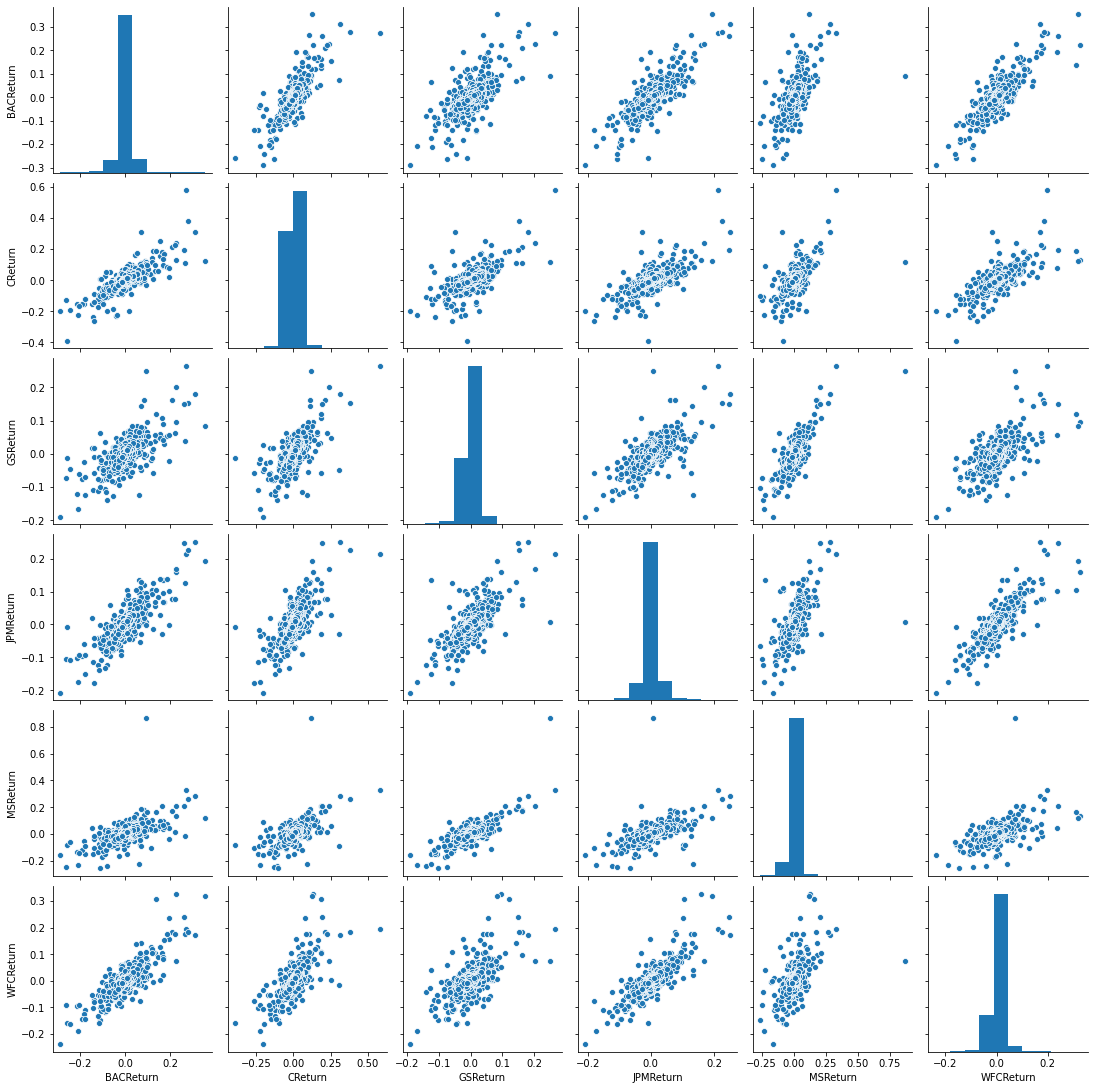

In [19]:
sns.pairplot(data=returns[1:])

In [20]:
returns.idxmin()
# Worst Drop (4 of them on Inauguration day)

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [21]:
returns.std()
# Citigroup riskiest

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

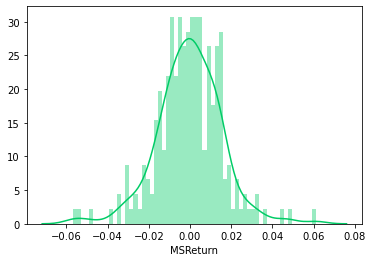

In [22]:
sns.distplot(returns.loc['2015-01-01':'2015-12-01']['MSReturn'],kde=True,bins=60, color='#00cc66')

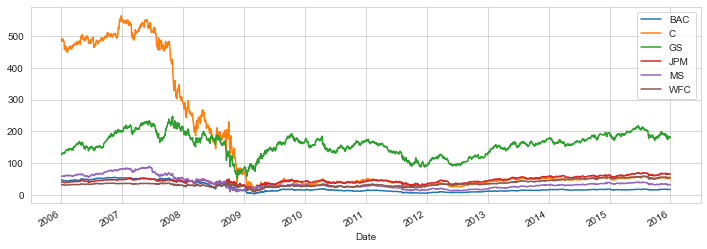

In [25]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [27]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

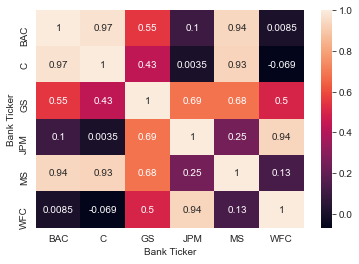

In [28]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [31]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [39]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')